In [3]:
#Hand microbiota heatmap: pre or post traveling o found taxa across passenger hands.
library(ggplot2)
library(vegan)
library(phyloseq)
library (ape)
library(phytools)
library(devtools)
library(gplots)

#devtools::install_github("hms-dbmi/UpSetR")
library(UpSetR)
library(dplyr)
data= read.table("metadata_R117.txt", header=T, row.names=1, sep="\t")#las muestras en los metadatos deben de estar en el mismo orden en el que estan en la tabla de OTUs
load("RData/metro.RData")
load("RData/rmetro6242.RData")
load("RData/grmetro.RData")
grmetro

metro
rmetro6242->rmetro
human=subset_samples(grmetro, biome=="human")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 954 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 82 sample variables ]
tax_table()   Taxonomy Table:    [ 954 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 75914 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 82 sample variables ]
tax_table()   Taxonomy Table:    [ 75914 taxa by 7 taxonomic ranks ]

In [4]:
#changing format
sitios2 <- as.table(otu_table(human))
write.table(sitios2,"sitios2.tmp")

#Including abundances
library(dplyr)
sitios5 <- read.table("sitios2.tmp", header=TRUE, row.names = 1)

ab=select(sitios5, "SA1","SA2","SA3","SA4","SA5","SA6","SA7","SA8")
comun= subset(ab,SA1>0&SA2>0&SA3>0&SA4>0&SA5>0&SA6>0&SA7>0&SA8>0)

SAvcomun=rownames(comun)
SAvcomun


[1] "580"    "669"    "689"    "796"    "1016"   "1245"   "1290"   "1512"  
 [9] "1859"   "1999"   "2782"   "4818"   "7001"   "18205"  "611580" "635993"
[17] "753691" "755094" "771417" "833895" "868771"

In [5]:
sitios5 <- read.table("sitios2.tmp", header=TRUE, row.names = 1)

ab=select(sitios5, SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8)
comun= subset(ab,SD1>0&SD2>0&SD3>0&SD4>0&SD5>0&SD6>0&SD7>0&SD8>0)#, #&SA1>0&SA2>0&SA3>0&SA4>0&SA5>0&SA6>0&SA7>0&SA8>0

SDvcomun=rownames(comun)
SDvcomun


[1] "59"     "129"    "580"    "669"    "689"    "793"    "796"    "1016"  
 [9] "1245"   "1290"   "1446"   "1512"   "1525"   "1707"   "1775"   "1900"  
[17] "1999"   "2039"   "2782"   "2793"   "2958"   "3112"   "3752"   "4818"  
[25] "7001"   "10770"  "18205"  "18285"  "609348" "611580" "615359" "618877"
[33] "624459" "635084" "635993" "663939" "721029" "721623" "722785" "722902"
[41] "727960" "728537" "728825" "729139" "750117" "753691" "755094" "767778"
[49] "771398" "771417" "807015" "815012" "831295" "832160" "833895" "840065"
[57] "854447" "860608" "868771" "913725" "939606" "942806"

In [6]:
human_transf<-transform_sample_counts(human, function(OTU) (OTU/sum(OTU)))

comun=unique(c(SAvcomun,SDvcomun))
comun
length(unique(comun))
length(comun)

my_subset <- subset(otu_table(human_transf), rownames(otu_table(human_transf)) %in% comun)
new_physeq <- merge_phyloseq(my_subset, tax_table(human_transf), sample_data(human_transf))

snew_physeq=subset_samples(new_physeq, SampleID=="SD1"| SampleID=="SD2"| SampleID=="SD3"| 
                           SampleID=="SD4"| SampleID=="SD5"| SampleID=="SD6"| 
                           SampleID=="SD7"| SampleID=="SD8"| SampleID=="SA1"| 
                           SampleID=="SA2"| SampleID=="SA3"| SampleID=="SA4"| 
                           SampleID=="SA5"| SampleID=="SA6"| SampleID=="SA7"| 
                           SampleID=="SA8")

snew_physeq


[1] "580"    "669"    "689"    "796"    "1016"   "1245"   "1290"   "1512"  
 [9] "1859"   "1999"   "2782"   "4818"   "7001"   "18205"  "611580" "635993"
[17] "753691" "755094" "771417" "833895" "868771" "59"     "129"    "793"   
[25] "1446"   "1525"   "1707"   "1775"   "1900"   "2039"   "2793"   "2958"  
[33] "3112"   "3752"   "10770"  "18285"  "609348" "615359" "618877" "624459"
[41] "635084" "663939" "721029" "721623" "722785" "722902" "727960" "728537"
[49] "728825" "729139" "750117" "767778" "771398" "807015" "815012" "831295"
[57] "832160" "840065" "854447" "860608" "913725" "939606" "942806"

[1] 63

[1] 63

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 63 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 82 sample variables ]
tax_table()   Taxonomy Table:    [ 63 taxa by 7 taxonomic ranks ]

In [7]:
#sorting samples
list <- c("SA1","SA2","SA3","SA4","SA5","SA6","SA7","SA8", "SD1","SD2","SD3","SD4","SD5","SD6","SD7","SD8")

otu_table(snew_physeq)=otu_table(snew_physeq)[,list]
otu_table(snew_physeq)[otu_table(snew_physeq) == 0] <- NA


[1] "o__Pseudomonadales f__Pseudomonadaceae"    
 [2] "o__Cytophagales f__Cytophagaceae"          
 [3] "o__Pseudomonadales f__Moraxellaceae"       
 [4] "o__Pseudomonadales f__Moraxellaceae"       
 [5] "o__Enterobacteriales f__Enterobacteriaceae"
 [6] "o__Pseudomonadales f__Moraxellaceae"       
 [7] "o__Bacillales f__Staphylococcaceae"        
 [8] "o__Clostridiales f__Veillonellaceae"       
 [9] "o__Lactobacillales f__Streptococcaceae"    
[10] "o__Pasteurellales f__Pasteurellaceae"      
[11] "o__Lactobacillales f__Aerococcaceae"       
[12] "o__Burkholderiales f__Oxalobacteraceae"    
[13] "o__Lactobacillales f__Streptococcaceae"    
[14] "o__Pseudomonadales f__Pseudomonadaceae"    
[15] "o__Alteromonadales f__[Chromatiaceae]"     
[16] "o__Lactobacillales f__Leuconostocaceae"    
[17] "o__Lactobacillales f__Carnobacteriaceae"   
[18] "o__Enterobacteriales f__Enterobacteriaceae"
[19] "o__Gemellales f__Gemellaceae"              
[20] "o__Aeromonadales f__Aeromonadaceae"        
[21] "o__Enterobacteriales f__Enterobacteriaceae"
[22] "o__Lactobacillales f__Lactobacillaceae"    
[23] "o__Xanthomonadales f__Xanthomonadaceae"    
[24] "o__Neisseriales f__Neisseriaceae"          
[25] "o__Burkholderiales f__Oxalobacteraceae"    
[26] "o__Enterobacteriales f__Enterobacteriaceae"
[27] "o__Bacillales f__Planococcaceae"           
[28] "o__Burkholderiales f__Comamonadaceae"      
[29] "o__Bacillales f__Bacillaceae"              
[30] "o__Flavobacteriales f__[Weeksellaceae]"    
[31] "o__Bacteroidales f__Prevotellaceae"        
[32] "o__Flavobacteriales f__[Weeksellaceae]"    
[33] "o__Flavobacteriales f__Flavobacteriaceae"  
[34] "o__Bacteroidales f__[Paraprevotellaceae]"  
[35] "o__Actinomycetales f__Cellulomonadaceae"   
[36] "o__Actinomycetales f__Micrococcaceae"      
[37] "o__Cytophagales f__Cytophagaceae"          
[38] "o__Actinomycetales f__Actinomycetaceae"    
[39] "o__Actinomycetales f__Micrococcaceae"      
[40] "o__Actinomycetales f__Micrococcaceae"      
[41] "o__Actinomycetales f__Dermabacteraceae"    
[42] "o__Actinomycetales f__Cellulomonadaceae"   
[43] "o__Actinomycetales f__Intrasporangiaceae"  
[44] "o__Actinomycetales f__Intrasporangiaceae"  
[45] "o__Actinomycetales f__Nocardiaceae"        
[46] "o__Actinomycetales f__Micrococcaceae"      
[47] "o__Actinomycetales f__Micrococcaceae"      
[48] "o__Actinomycetales f__Propionibacteriaceae"
[49] "o__Actinomycetales f__"                    
[50] "o__Deinococcales f__Deinococcaceae"        
[51] "o__Actinomycetales f__Nocardioidaceae"     
[52] "o__Bifidobacteriales f__Bifidobacteriaceae"
[53] "o__Actinomycetales f__Mycobacteriaceae"    
[54] "o__Actinomycetales f__Geodermatophilaceae" 
[55] "o__Actinomycetales f__Geodermatophilaceae" 
[56] "o__Actinomycetales f__Corynebacteriaceae"  
[57] "o__Actinomycetales f__Sporichthyaceae"     
[58] "o__Actinomycetales f__Dietziaceae"         
[59] "o__Actinomycetales f__Nocardioidaceae"     
[60] "o__Actinomycetales f__Micrococcaceae"      
[61] "o__Sphingomonadales f__Sphingomonadaceae"  
[62] "o__Fusobacteriales f__Leptotrichiaceae"    
[63] "o__Fusobacteriales f__Fusobacteriaceae"

Warning message in heatmap.2(otu_table(snew_physeq), Rowv = as.dendrogram(row.clus), :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

ERROR: Error in as(x, "matrix")[i, j, drop = FALSE]: (subscript) subscrito lógico muy largo


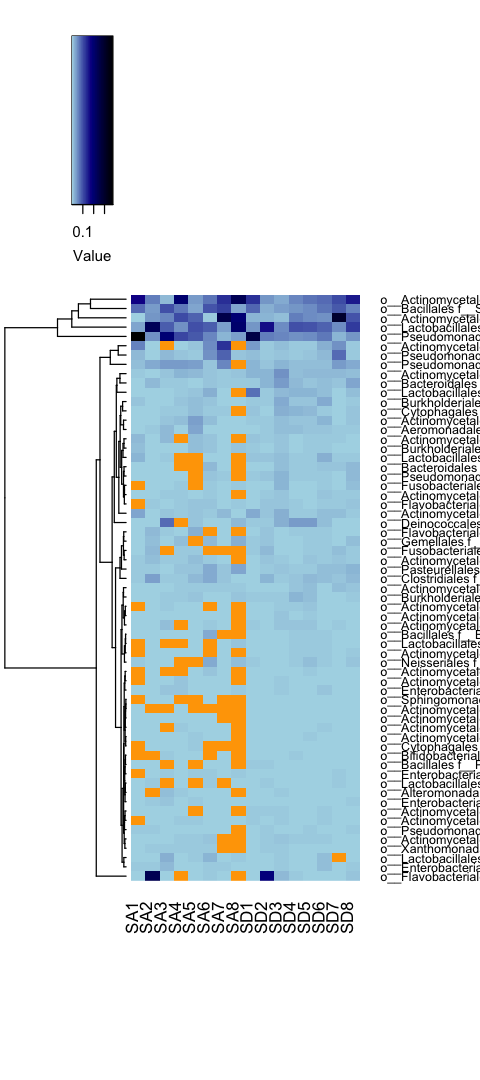

In [11]:
#distance and clustering
data.dist <- vegdist(otu_table(snew_physeq), method = "manhattan")
row.clus <- hclust(data.dist, "ward.D2")

ord=tax_table(snew_physeq)
scaleyellowred <- colorRampPalette(c("lightblue","darkblue", "black"))(100)

paste_ord=paste(ord[,4],ord[,5])
paste_ord
options(repr.plot.width=4, repr.plot.height=9)
#To save to plot, it had to be made in R studio
heatmap.2(otu_table(snew_physeq), 
         Rowv = as.dendrogram(row.clus), Colv = FALSE, col = scaleyellowred, 
        margins = c(10, 6), na.color="orange", key=T,symkey=F, 
         labRow =paste_ord ,trace="none")

